# <a id="#">Task 4 – Edge detection: Derivative operators</a>

In [1]:
import numpy
import matplotlib.pyplot as plt
import skimage.io

---

## Prewitt filters

**<a id="#">Task 4.1.1.</a>** Load the image `data/lena.png` and show it:

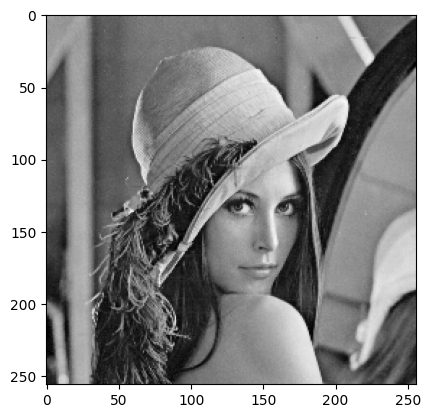

In [7]:
lena = plt.imread("data/lena.png")
plt.imshow(lena, "gray")

**<a id="#">Task 4.1.2.</a>** Implement horizontal and vertical $3 \times 3$ Prewitt filters:

In [27]:
def prewitt_h(img):
    img_h = img.copy()    
    result = numpy.zeros(img_h.shape)
    size = 3
    n = (size - 1) // 2
    for p in numpy.ndindex(img_h.shape):
        neighborhood_sum = 0
        r = p[0]
        c = p[1]
        if r >= (0+n) and c >= (0+n) and r < (img_h.shape[0]-n) and c < (img_h.shape[1]-n):
            for q in numpy.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                if q[1] == 0:
                    neighborhood_sum -= img_h[r2, c2]
                elif q[1] == size-1:
                    neighborhood_sum += img_h[r2, c2]
        result[r, c] = (neighborhood_sum)/(6)
    
    return result

def prewitt_v(img):
    img_v = img.copy() 
    result = numpy.zeros(img_v.shape)
    size = 3
    n = (size - 1) // 2
    for p in numpy.ndindex(img_v.shape):
        neighborhood_sum = 0
        r = p[0]
        c = p[1]
        if r >= (0+n) and c >= (0+n) and r < (img_v.shape[0]-n) and c < (img_v.shape[1]-n):
            for q in numpy.ndindex(size, size):
                r2 = p[0]+q[0]-n
                c2 = p[1]+q[1]-n
                if q[0] == 0:
                    neighborhood_sum -= img_v[r2, c2]
                elif q[0] == size-1:
                    neighborhood_sum += img_v[r2, c2]
        result[r, c] = (neighborhood_sum)/(6)
    
    return result

**<a id="#">Task 4.1.3.</a>** Test your above solution using the functions `prewitt_h` and `prewitt_v` for the previously loaded image and show the result:

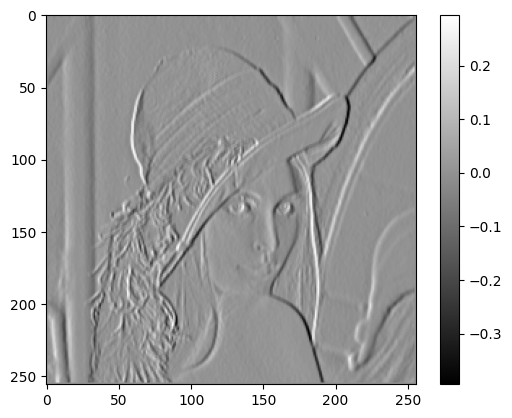

In [28]:
plt.imshow(prewitt_h(lena), "gray")
plt.colorbar()

#plt.imshow(prewitt_v(lena), "gray")
#plt.colorbar()

**<a id="#">Task 4.1.4.</a>** Compare your results with the correct result image `data/lena_prewitt_h.tiff` and `data/lena_prewitt_v.tiff`:

"lena_v = skimage.io.imread('data/lena_prewitt_v.tiff')\nplt.imshow(lena_v, 'gray')\nplt.colorbar()\nassert numpy.allclose(prewitt_v(lena), lena_v, atol=1/255)"

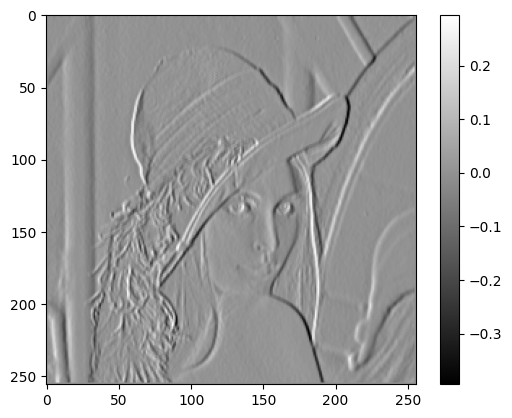

In [30]:
lena_h = skimage.io.imread('data/lena_prewitt_h.tiff')
plt.imshow(lena_h, 'gray')
plt.colorbar()
assert numpy.allclose(prewitt_h(lena), lena_h, atol=1/255)

'''lena_v = skimage.io.imread('data/lena_prewitt_v.tiff')
plt.imshow(lena_v, 'gray')
plt.colorbar()
assert numpy.allclose(prewitt_v(lena), lena_v, atol=1/255)'''

---

## Edge detection

**<a id="#">Task 4.2.1.</a>** Use your results from **Task 4.1.2 – 4.1.3** to compute the *gradient magnitude* of the image:

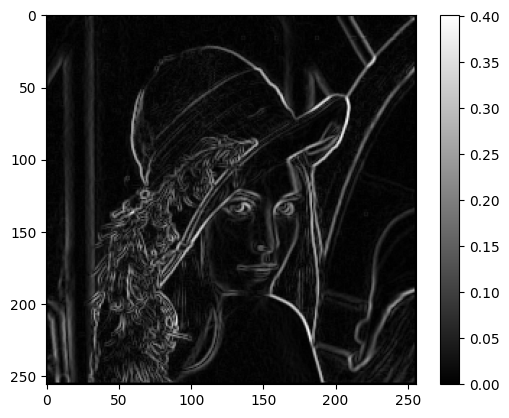

In [33]:
img_g = numpy.sqrt(prewitt_h(lena)**2 + prewitt_v(lena)**2)
plt.imshow(img_g, 'gray')
plt.colorbar()

**<a id="#">Task 4.2.2.</a>** Compare your result with the correct result image `data/lena_prewitt_gradmag.tiff`:

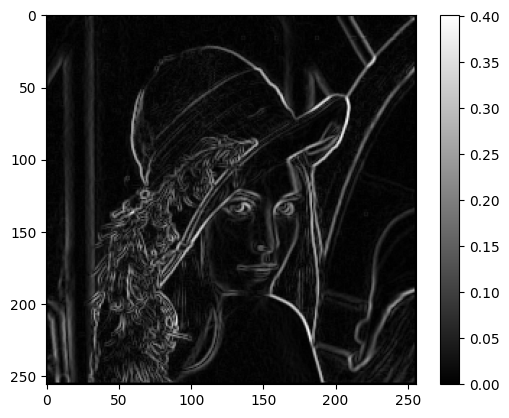

In [34]:
lena_g = skimage.io.imread('data/lena_prewitt_gradmag.tiff')
plt.imshow(lena_g, 'gray')
plt.colorbar()
assert numpy.allclose(img_g, lena_g, atol=1/255)

---

## Sobel filters (bonus)

**<a id="#">Task 4.3.1.</a>** Implement the two functions `sobel_h` and `sobel_v` for horizontal and vertical $3 \times 3$ Sobel filtering, respectively:

**<a id="#">Task 4.3.2.</a>** Test your above solution using the functions `sobel_h` and `sobel_v` for the previously loaded image and show the result:

**<a id="#">Task 4.3.3.</a>** Compare your results with the correct result image `data/lena_sobel_h.tiff` and `data/lena_sobel_v.tiff`: